<a href="https://colab.research.google.com/github/avp848/Classification-for-Heart-Failure/blob/main/HeartFailureProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
df = pd.read_csv('/content/heart_statlog_cleveland_hungary_final.csv')
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [ ]:
df['resting_bp_s'] = df['resting bp s']
df.drop(columns = ['resting bp s'], inplace = True)

In [ ]:
nominal = ['chest pain type', 'resting ecg', 'ST slope']
not_nominal = ['age', 'sex', 'cholesterol', 'fasting blood sugar', 'max heart rate', 'exercise angina', 'oldpeak', 'target']

In [ ]:
# nominal_df = df[nominal].copy(deep = True)
# not_nominal_df = df[not_nominal].copy(deep = True)

In [ ]:
final_df = pd.get_dummies(df, columns = nominal)
print(final_df)

      age  sex  cholesterol  fasting blood sugar  max heart rate  \
0      40    1          289                    0             172   
1      49    0          180                    0             156   
2      37    1          283                    0              98   
3      48    0          214                    0             108   
4      54    1          195                    0             122   
...   ...  ...          ...                  ...             ...   
1185   45    1          264                    0             132   
1186   68    1          193                    1             141   
1187   57    1          131                    0             115   
1188   57    0          236                    0             174   
1189   38    1          175                    0             173   

      exercise angina  oldpeak  target  resting_bp_s  chest pain type_1  \
0                   0      0.0       0           140                  0   
1                   0      1.0   

In [ ]:
training_columns = final_df.columns.tolist()
training_columns.remove('target')

y = final_df['target']
X = final_df[training_columns]

In [ ]:
df.query('target==1')

,age,sex,chest pain type,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target,resting_bp_s
1,49,0,3,180,0,0,156,0,1.0,2,1,160
3,48,0,4,214,0,0,108,1,1.5,2,1,138
8,37,1,4,207,0,0,130,1,1.5,2,1,140
11,58,1,2,164,0,1,99,1,2.0,2,1,136
13,49,1,4,234,0,0,140,1,1.0,2,1,140
...,...,...,...,...,...,...,...,...,...,...,...,...
1184,57,0,4,241,0,0,123,1,0.2,2,1,140
1185,45,1,1,264,0,0,132,0,1.2,2,1,110
1186,68,1,4,193,1,0,141,0,3.4,2,1,144
1187,57,1,4,131,0,0,115,1,1.2,2,1,130


In [ ]:
df.query('resting_bp_s > 75', inplace=True)

Text(0.5, 1.0, 'BP Histogram')

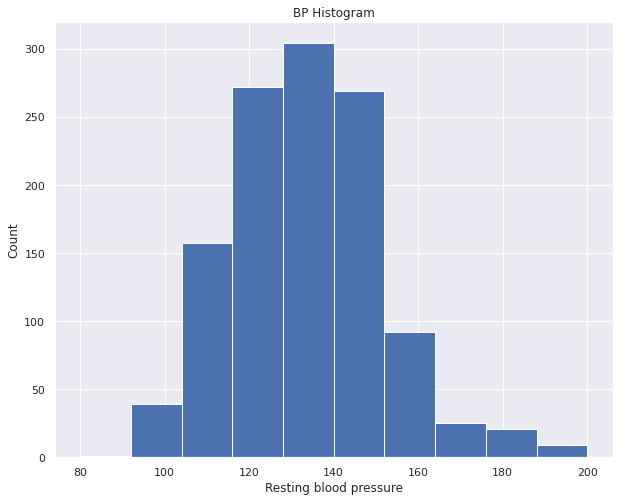

In [ ]:
plt.figure(figsize = (10,8))
plt.hist(df['resting_bp_s'])
plt.xlabel('Resting blood pressure')
plt.ylabel('Count')
plt.title('BP Histogram')

In [ ]:
len(df.query('resting_bp_s > 135 and target == 1'))/(len(df.query('resting_bp_s > 135')))

0.6025641025641025

In [ ]:
len(df.query('resting_bp_s < 120 and target == 1'))/(len(df.query('resting_bp_s < 120')))

0.4908256880733945

In [ ]:
len(df.query('120 < resting_bp_s < 135 and target == 1'))/(len(df.query('120 < resting_bp_s < 135')))

0.5080385852090032

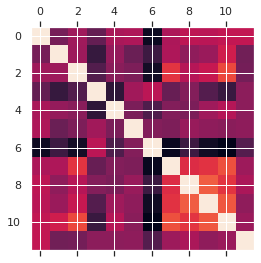

In [ ]:
plt.matshow(df.corr())

In [ ]:
#split data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y)

In [ ]:
from xgboost import XGBClassifier

#import k_fold
from sklearn.model_selection import KFold
kfold_model = KFold(n_splits = 10, shuffle = True)

#import GridSearchCV
from sklearn.model_selection import GridSearchCV

#picking params
model = XGBClassifier()
params = {'max_depth': [3, 4, 5, 6, 8], 'n_estimators': [50, 100, 200, 400], 'learning_rate': [0.01, 0.15, 0.2, 0.25, 0.5]}

model2 = GridSearchCV(model, params, cv = kfold_model) 
model2.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=XGBClassifier(),
             param_grid={'learning_rate': [0.01, 0.15, 0.2, 0.25, 0.5],
                         'max_depth': [3, 4, 5, 6, 8],
                         'n_estimators': [50, 100, 200, 400]})

In [ ]:
print(model2.best_params_)
print(model2.best_score_)

{'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 200}
0.9369956140350878


In [ ]:
from sklearn.metrics import confusion_matrix
prediction = model2.predict(x_test)
tn, fp, fn, tp = confusion_matrix(y_test, prediction).ravel()
print(tn, fp, fn, tp)

125 6 4 163


In [ ]:
from tensorflow import keras
from keras import metrics

In [ ]:
#Deep Neural Networks

sample_optimizer = keras.optimizers.Adam(learning_rate=0.01, beta_1=0.7, beta_2=0.8)
early_stopping_condition = keras.callbacks.EarlyStopping(monitor='val_loss', mode='auto', patience=15)
plateau_monitor = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', mode='auto', patience=5, factor=0.3, min_lr=0.00000001) 
sample_loss = keras.losses.BinaryCrossentropy() 

num_outputs = 1

model3 = keras.Sequential()
model3.add(keras.layers.Dense(6, input_dim=len(x_train.columns), activation='relu'))
#model3.add(keras.layers.Dense(8, activation='relu'))
model3.add(keras.layers.Dense(2, activation='relu'))
model3.add(keras.layers.Dense(num_outputs, activation='sigmoid')) 

In [ ]:
model3.compile(loss=sample_loss, optimizer=sample_optimizer)
history = model3.fit(x_train, y_train, epochs=75, batch_size = 50, callbacks=[early_stopping_condition, plateau_monitor], validation_data=(x_test, y_test))

Epoch 1/75
18/18 [==============================] - 1s 12ms/step - loss: 19.0476 - val_loss: 1.9424 - lr: 0.0100
Epoch 2/75
18/18 [==============================] - 0s 6ms/step - loss: 0.9394 - val_loss: 0.6464 - lr: 0.0100
Epoch 3/75
18/18 [==============================] - 0s 5ms/step - loss: 0.5982 - val_loss: 0.6163 - lr: 0.0100
Epoch 4/75
18/18 [==============================] - 0s 4ms/step - loss: 0.5985 - val_loss: 0.5875 - lr: 0.0100
Epoch 5/75
18/18 [==============================] - 0s 6ms/step - loss: 0.5699 - val_loss: 0.6358 - lr: 0.0100
Epoch 6/75
18/18 [==============================] - 0s 4ms/step - loss: 0.5886 - val_loss: 0.5766 - lr: 0.0100
Epoch 7/75
18/18 [==============================] - 0s 5ms/step - loss: 0.5502 - val_loss: 0.5821 - lr: 0.0100
Epoch 8/75
18/18 [==============================] - 0s 4ms/step - loss: 0.5629 - val_loss: 0.5813 - lr: 0.0100
Epoch 9/75
18/18 [==============================] - 0s 4ms/step - loss: 0.5752 - val_loss: 0.5479 - lr: 0.0100

In [ ]:
prediction = model3.predict(x_test)
prediction = np.round(prediction)
tn, fp, fn, tp = confusion_matrix(y_test, prediction).ravel()
print(tn, fp, fn, tp)

105 26 19 148


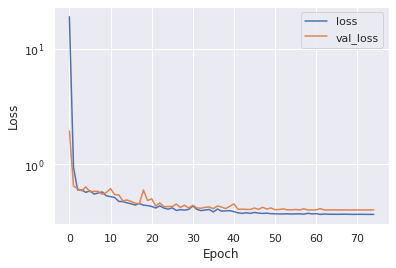

In [ ]:
plt.figure()
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.yscale('log')
plt.legend()